# 3.2.1 Sigmoid Function

앞선 3.1에서의 [식 3.3]과 같은 활성화 함수는 임계값을 경계로 출력이 바뀐다. 이런 함수를 "계단 함수"라고 한다. 따라서 퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다.

활성화 함수로는 계단 함수 이외의 함수를 사용할 수 있는데, 그 중 하나가 시그모이드 함수(Sigmoid Function)이다.

시그모이드 함수는,

$
h(x) = \frac{1}{1 + exp(-x)}
\qquad$ [식 3.6]

이다.

[식 3.6]에서 $exp(-x)$는 $e^{-x}$를 뜻하며, $e$는 자연상수로 2.7182...의 값을 갖는 실수이다. 시그모이드 함수에 1.0과 2.0을 대입하면 각각 $h(1.0) = 0.731, h(2.0) = 0.880$을 출력한다.

시그모이드 함수의 개형은 다음과 같다.


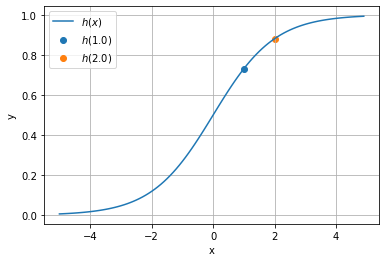

In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("시그모이드 함수의 개형은 다음과 같다.")

def sigmoid(x):
    
    y = 1 / (1 + np.exp(-x))
    
    return y

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x, y, label="$h(x)$")
plt.scatter(1.0, sigmoid(1.0), marker="o", label="$h(1.0)$")
plt.scatter(2.0, sigmoid(2.0), marker="o", label="$h(2.0)$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고 그 변환된 신호를 다음 뉴런에 전달한다. 앞장에서 본 퍼셉트론과 앞으로 볼 신경망의 주된 차이는 이 활성화 함수가 다르다는 점이다. 그 외의 뉴런이 여러 층으로 이어지는 구조와 신호를 전달하는 방법은 기본적으로 앞에서 살펴본 퍼셉트론과 동일하다.

# 3.2.2 계단 함수 구현하기

계단 함수는 [식 3.3]과 같이 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수이다.

In [5]:
def step_function(x):
    
    if x > 0:
        y = 1
    else:
        y = 0
        
    return y

이는 입력값으로 실수만을 받아드릴 수 있다.

numpy의 array값을 받고 싶다면,

In [6]:
def step_function(x):
    y = x > 0
    return y.astype(np.int64)

이는 1과 0으로 이루어진 array를 출력하고, 각각 1은 $x > 0$을, 0은 $x \le 0$을 의미한다. 

In [7]:
print("확인해보자.")

x = np.array([-1., 1., 2.])
y = step_function(x)
print(f"[-1., 1., 2.]의 출력 결과는 {y} 이다.")

확인해보자.
[-1., 1., 2.]의 출력 결과는 [0 1 1] 이다.


# 3.2.3 계단 함수의 그래프

계단 함수의 그래프를 그려보자

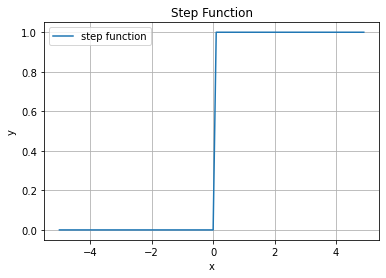

In [9]:
x = np.arange(-5, 5, 0.1)
y = step_function(x)

plt.plot(x, y, label="step function")
plt.title("Step Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

계단 함수라는 이름은 이와 같이 계단과 같은 형상을 띄는 그래프 개형에서 따온 것이다.

# 3.2.4 시그모이드 함수 구현하기

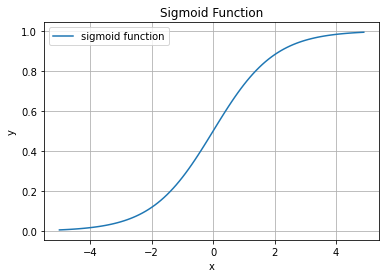

In [10]:
def sigmoid(x):
    
    y = 1 / (1 + np.exp(-x))
    
    return y

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x, y, label="sigmoid function")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# 3.2.5 시그모이드 함수와 계단 함수 비교하기

시그모이드 함수와 계단 함수를 같이 그려보자


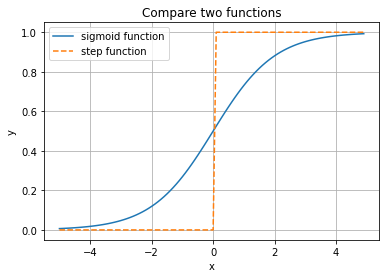

In [11]:
print("시그모이드 함수와 계단 함수를 같이 그려보자")

x = np.arange(-5, 5, 0.1)
y_sig = sigmoid(x)
y_step = step_function(x)

plt.plot(x, y_sig, label="sigmoid function")
plt.plot(x, y_step, label="step function", linestyle="--")
plt.title("Compare two functions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

시그모이드 함수와 계단 함수의 차이는 매끄러움의 차이이다. 시그모이드 함수는 입력값에 따른 출력값이 매끄럽게 변화하는 반면, 계단 함수는 입력값중 0을 경계로 값이 갑자기 바뀌어 버린다. 시그모이드 함수의 이 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 된다.

이 차이는 퍼셉트론과 신경망의 차이로도 이어진다.

계단 함수는 0과 1만을 출력하여, 퍼셉트론의 회로의 0과 1만이 흐르지만, 시그모이드 함수는 실수를 출력하므로 신경망의 회로에서는 연속적인 실수가 흐르게 된다.

이 두 함수의 공통점으로는 입력값이 작을 수록 출력값은 작아지게 되고, 입력값이 커지게 되면 출력값은 커지게 된다. 또한, 입력이 아무리 큰 값, 작은 값을 가지더라도 출력값은 0과 1 사이에만 존재한다.

# 3.2.6 비선형 함수

비선형 함수에 앞서 선형 함수란, 

$
f(\alpha x + \beta y)
= \alpha f(x) + \beta f(y)
$

인 중첩(superposition)을 만족시키는 함수를 말한다. 그리고 이를 만족시키지 않는 함수를 비선형 함수라고 한다.

신경망에서는 활성화함수로 선형 함수를 사용하는 것은 의미가 없는데, 그 이유는 선형 함수를 사용할 경우 신경망의 층을 깊게 하는 의미가 없어지기 때문이다.

예를 들어, $h(x) = cx$라는 함수를 활성화 함수로 가지는 3층 신경망이 있다고 하자. 그럼 $y = h(h(h(x)))$가 되고, 이는 $y = c^3x$인데, 이는 그저 $y = ax$로 $a = c^3$로 표현하여 단층으로 구성하여도 똑같기 때문이다.

이처럼 선형 함수를 사용할 경우에는 다층 구조의 이점을 살릴 수가 없게 된다.

# 3.2.7 ReLU 함수 (Recified Linear Unit)

최근에는 앞서 본 시그모이드 함수보다는, ReLU 함수를 자주 이용한다.

ReLU 함수를 0 이하를 입력하면 0을, 0 초과를 입력하면 그 입력값을 반환하는 함수이다.

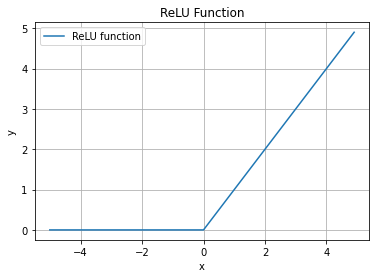

In [3]:
def ReLU(x):
    w = x > 0
    y = x * w.astype(np.int64)
    return y

x = np.arange(-5, 5, 0.1)
y = ReLU(x)

plt.plot(x, y, label="ReLU function")
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

이 함수를 수식으로 표현하면,

$
h(x) = 
\begin{cases}
x & (x > 0) \\
0 & (x \le 0)
\end{cases}
\qquad$ [식 3.7]

이와 같다.

In [13]:
def ReLU(x):
    return np.maximum(0, x)